## Week Two Advanced Assignment
### Part One
#### Pytorch Fundamentals

#### 1. Dataset loading

In [2]:
#a: Load the Synchronous ML Dataset as numpy array

#Let's start by importing the required libraries
import zipfile
import pandas as pd

#Let's download the dataset from the site to colab environment using wget. Alternatively we can use curl
!wget https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip -O data.zip


--2023-12-28 16:24:00--  https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [ <=>                ]  14.37K  --.-KB/s    in 0.02s   

2023-12-28 16:24:01 (579 KB/s) - ‘data.zip’ saved [14713]



In [4]:
#it is a zip file, let's unzip
# unzip data
with zipfile.ZipFile("data.zip", 'r') as my_zip:
  my_zip.extractall()

In [10]:
# reading the csv file (i.e the unzipped data) and parse to pandas
dataset_name = "synchronous machine.csv"
data = pd.read_csv(dataset_name, delimiter=";", thousands=',')
# get numpy data.
numpy_data = data.values #This means that we have assigned the data values to a numpy array
print(numpy_data)
print(type (numpy_data))  #just checking the type to see clearly that the data is now loaded as numpy array

[[   3   66   34  383 1563]
 [   3   68   32  372 1552]
 [   3    7    3   36  154]
 ...
 [   6   95    5   16  134]
 [   6   97    3   16  134]
 [   6   99    1   16  134]]
<class 'numpy.ndarray'>


In [12]:
#b: Convert the Numpy array to PyTorch tensor
import torch
original_data_tensor = torch.tensor(numpy_data)

# Print the resulting PyTorch tensor
print(original_data_tensor)
print(type(original_data_tensor)) #Checking the type


tensor([[   3,   66,   34,  383, 1563],
        [   3,   68,   32,  372, 1552],
        [   3,    7,    3,   36,  154],
        ...,
        [   6,   95,    5,   16,  134],
        [   6,   97,    3,   16,  134],
        [   6,   99,    1,   16,  134]])
<class 'torch.Tensor'>


#### 2. Art of ”Tensor Manipulation”

In [17]:
#(a) Print the size of the dataset
print(original_data_tensor.size())




torch.Size([557, 5])


In [18]:
print(original_data_tensor.shape)

#The data is a 2D tensor with 557 rows and 5 columns
#In this case shape and size gives the same result because
#size" and "shape" are often used interchangeably for 2D tensors because the shape is fully described by the number of rows and columns.

torch.Size([557, 5])


#### (b) Create a tensor, my pi tensor of same size as original data tensor containing values of 3.142 at every point and placed on your GPU device. Print the first 13 rows. Print tensor device location. Print tensor datatype.


In [22]:
#Creating a tensor of same size 557, 5

# Specify the size of the tensor (shape)

tensor_size = (557, 5)

my_pi_tensor =  torch.full(tensor_size, fill_value=3.142) #created on cpu

my_pi_tensor1 = my_pi_tensor.to('cuda') #moved to gpu

# Display the created tensor
print(my_pi_tensor.device)
print(my_pi_tensor1.device)

cpu
cuda:0


In [23]:
#first 13 rows
print(my_pi_tensor1[:13, :])


tensor([[3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420]], device='cuda:0')


In [26]:
# Print tensor device location
print("\nTensor device location:", my_pi_tensor.device)
# Print tensor device location
print("\nTensor device location:", my_pi_tensor1.device)

#data type
print("\nTensor data type:", my_pi_tensor1.dtype)


Tensor device location: cpu

Tensor device location: cuda:0

Tensor data type: torch.float32


In [27]:
#(c) Print the fifth-root of the sum of all values in my pi tensor

fifthroot = torch.pow(torch.sum(my_pi_tensor1), 1/5)

print("Fifth root of the sum of all values:", fifthroot.item())

Fifth root of the sum of all values: 6.143364429473877


In [28]:
 # (d) Create a new tensor, my data tensor using the first and last 100 rows from the original data tensor.
#Print size of my data tensor [Expect a size of 200 rows].

first_100_rows = original_data_tensor[:100, :]
last_100_rows = original_data_tensor[-100:, :]

my_data_tensor = torch.cat([first_100_rows, last_100_rows], dim=0) #torch.cat() concatenates the two selected parts along the specified dimension (dimension 0 in this case, which corresponds to rows). When dim=1 means columns

# Print the size of my_data_tensor
print("Size of my_data_tensor:", my_data_tensor.size())

Size of my_data_tensor: torch.Size([200, 5])


#### (d) Create two 1-D tensors, features and target from my_data_tensor. The feature is dIf (Changing of excitation current of synchronous machine) 4th column and target is If (Excitation current of synchronous machine) 5th column in the data set

In [34]:
features = my_data_tensor[:, 3].unsqueeze(dim=1)  # Note DIF is the 4th column i.e index 3 because index start from 0
target = my_data_tensor[:, 4].unsqueeze(dim=1)    # IF is index 4 the 5th column & we added unsqueeze dim=1 to have them as column vectors
# Print the size of the features and target tensors
print("Size of features tensor:", features.size())
print("Size of target tensor:", target.size())
print(features[:10], target[:10]) #checking the 1st ten data points in the columns

Size of features tensor: torch.Size([200, 1])
Size of target tensor: torch.Size([200, 1])
tensor([[383],
        [372],
        [ 36],
        [338],
        [317],
        [301],
        [ 29],
        [ 28],
        [ 25],
        [221]]) tensor([[1563],
        [1552],
        [ 154],
        [1518],
        [1497],
        [1481],
        [ 147],
        [ 146],
        [ 143],
        [1401]])


In [36]:
# (f) Split your data into training and test data of ratio 75:25 respectively.
train_split = int(0.75 * len(features)) #this train split is just a variable keeping the integer value of the 75% of leng of features. since feactures is 200, this will keep 150
X_train, y_train = features[:train_split], target[:train_split] #taking 75% of the data for training I.e from the first to 150 index
X_test, y_test = features[train_split:], target[train_split:] #taking 25% for testing #i.e from 150 to the end for testing

len(X_train), len(y_train), len(X_test), len(y_test)

(150, 150, 50, 50)

In [47]:
#Let's see the visualization of the above
import matplotlib.pyplot as plt
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(7, 5))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

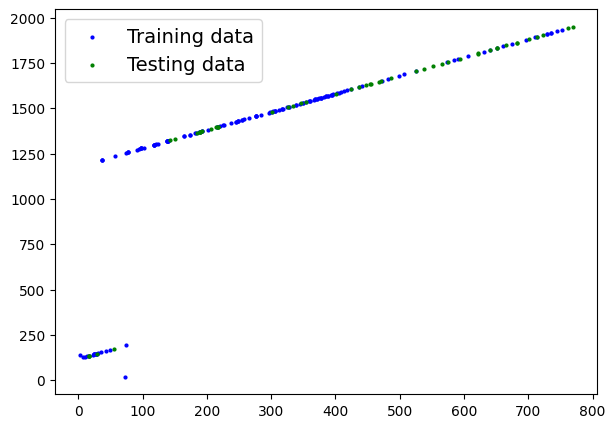

In [48]:
plot_predictions();

#### 3. Define your Linear model structure. You can use existing model.

In [37]:
# Creating a Linear Regression model class
from torch import nn
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

#Q: Implement the forward() method to compute the linear regression function you used to create the dataset in 1.

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


#### 4. Train model for any number of epochs. Generate 1 plot of Loss against Epoch during model training and testing. Choose any set of hyperparameters for model training.

In [61]:
#Before we train, let's see what our linear model consist of
# Set manual seed since nn.Parameter are randomly initialzied.
torch.manual_seed(20)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_SM = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_SM.parameters())

[Parameter containing:
 tensor([-1.2061], requires_grad=True),
 Parameter containing:
 tensor([0.0617], requires_grad=True)]

In [62]:
#Checking what the model contains using .state_dict().
# List named parameters
model_SM.state_dict()

OrderedDict([('weights', tensor([-1.2061])), ('bias', tensor([0.0617]))])

In [66]:
# To train the model, we also need to define a loss function and an optimizer
# Creating the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_SM.parameters(), # parameters of target model to optimize
                            lr=0.02) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [67]:
#Training our model

torch.manual_seed(30)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 400

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_SM.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_SM(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_SM.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_SM(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 446.1817321777344 | MAE Test Loss: 368.0072326660156 
Epoch: 10 | MAE Train Loss: 789.4594116210938 | MAE Test Loss: 620.8642578125 
Epoch: 20 | MAE Train Loss: 1086.27099609375 | MAE Test Loss: 356.8154602050781 
Epoch: 30 | MAE Train Loss: 630.5028686523438 | MAE Test Loss: 651.4269409179688 
Epoch: 40 | MAE Train Loss: 1075.8199462890625 | MAE Test Loss: 354.7289123535156 
Epoch: 50 | MAE Train Loss: 759.01025390625 | MAE Test Loss: 631.2210083007812 
Epoch: 60 | MAE Train Loss: 1015.7127075195312 | MAE Test Loss: 379.4146423339844 
Epoch: 70 | MAE Train Loss: 726.3377075195312 | MAE Test Loss: 621.1259155273438 
Epoch: 80 | MAE Train Loss: 1086.098388671875 | MAE Test Loss: 356.7501525878906 
Epoch: 90 | MAE Train Loss: 630.3274536132812 | MAE Test Loss: 651.6883544921875 
Epoch: 100 | MAE Train Loss: 1075.64599609375 | MAE Test Loss: 354.64337158203125 
Epoch: 110 | MAE Train Loss: 758.8339233398438 | MAE Test Loss: 631.4824829101562 
Epoch: 120 | MAE Tr

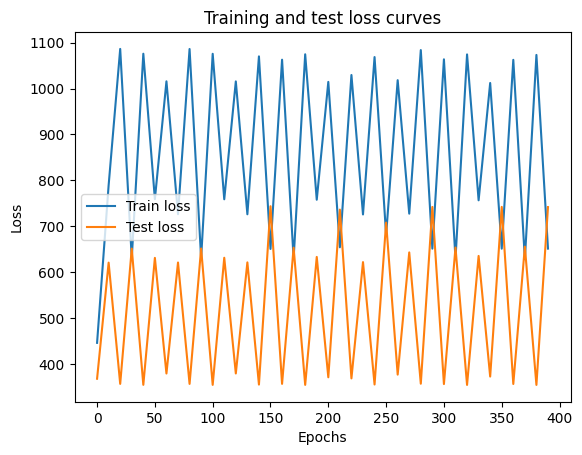

In [68]:
 #Plotting the loss curves

plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

It can be observed that  both the losses are fluctuating without clear convergence. It is neither a sign of overfitting nor underfitting as both fluctuate without a consistent pattern. We may consider trying to adjust the parameters, try a different loss, or play a bit with the learning rate.It may also be possible that there are outiers in the dataset